In [29]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [113]:
df= pd.read_csv("bfi.csv")

In [114]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [115]:
df.dropna(inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [16]:
# Perform Barlett's test to check if there exists inter correlation
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
#p value 0 indicating, there is no intercorrelation and we can do FA

(18210.199553924962, 0.0)

In [17]:
# Perform KMO test, to check adequacy of factors to perform FA, If KMO<0.6 no FA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [18]:
kmo_model

0.8482210116350438

In [19]:
# KMO value >0.6 indicating factors are adequate and hence can do FA

In [109]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25,rotation= None)

fa.fit(df)

#Check Eigen values
ev,v = fa.get_eigenvalues()


ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

In [94]:
# Six factors have Eigen values >1, so choose only those

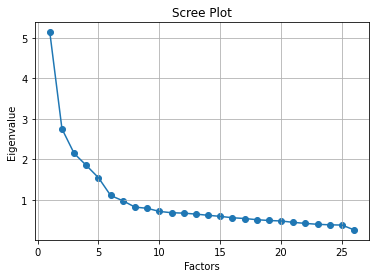

In [95]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [117]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6,rotation= 'varimax')
fa.fit(df)


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [128]:
fa.loadings_
#Each factor has high loadings of a list of variables
#Fac 6 doesn't have any high loadings so 5 factors should be enough to perform analysis

array([[-0.01924556, -0.06170286,  0.0348648 , -0.01867751,  0.0143449 ],
       [ 0.1064546 ,  0.0307053 ,  0.02756749, -0.42961248, -0.07413314],
       [ 0.02869339,  0.22712712,  0.14115892,  0.62180104,  0.0641174 ],
       [ 0.0053354 ,  0.32992706,  0.11592822,  0.64285597,  0.06164725],
       [-0.06944324,  0.2092169 ,  0.23541803,  0.43124101, -0.10864741],
       [-0.12900241,  0.39769001,  0.09790092,  0.52815947,  0.0753634 ],
       [ 0.00954751,  0.04829695,  0.54827569,  0.04119434,  0.21216878],
       [ 0.08997526,  0.01445863,  0.65030388,  0.10569283,  0.11658219],
       [-0.03024319,  0.01082522,  0.55578126,  0.11416497, -0.00481157],
       [ 0.24079401, -0.03932582, -0.63357583, -0.04146169, -0.1096952 ],
       [ 0.29433007, -0.15417946, -0.56699105, -0.04785845,  0.03126425],
       [ 0.05706633, -0.57646013,  0.01718243, -0.08965972, -0.07321838],
       [ 0.2616608 , -0.67156053, -0.12149036, -0.09678776, -0.05968008],
       [ 0.01241719,  0.53305616,  0.0

In [125]:
fa = FactorAnalyzer(n_factors=5,rotation= 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [126]:
fa.loadings_

array([[-0.01924556, -0.06170286,  0.0348648 , -0.01867751,  0.0143449 ],
       [ 0.1064546 ,  0.0307053 ,  0.02756749, -0.42961248, -0.07413314],
       [ 0.02869339,  0.22712712,  0.14115892,  0.62180104,  0.0641174 ],
       [ 0.0053354 ,  0.32992706,  0.11592822,  0.64285597,  0.06164725],
       [-0.06944324,  0.2092169 ,  0.23541803,  0.43124101, -0.10864741],
       [-0.12900241,  0.39769001,  0.09790092,  0.52815947,  0.0753634 ],
       [ 0.00954751,  0.04829695,  0.54827569,  0.04119434,  0.21216878],
       [ 0.08997526,  0.01445863,  0.65030388,  0.10569283,  0.11658219],
       [-0.03024319,  0.01082522,  0.55578126,  0.11416497, -0.00481157],
       [ 0.24079401, -0.03932582, -0.63357583, -0.04146169, -0.1096952 ],
       [ 0.29433007, -0.15417946, -0.56699105, -0.04785845,  0.03126425],
       [ 0.05706633, -0.57646013,  0.01718243, -0.08965972, -0.07321838],
       [ 0.2616608 , -0.67156053, -0.12149036, -0.09678776, -0.05968008],
       [ 0.01241719,  0.53305616,  0.0

In [129]:
# Get variance of each factors
fa.get_factor_variance()

#SS Loadings
#Proportional Variance
#Cumulative variance

(array([2.7361091 , 2.42804922, 2.08250384, 1.80050523, 1.54950195]),
 array([0.10523497, 0.09338651, 0.0800963 , 0.0692502 , 0.05959623]),
 array([0.10523497, 0.19862147, 0.27871778, 0.34796798, 0.40756421]))

In [ ]:
#40.7% cumulative variance is explained by 5 factors